In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

# Load the Data

In [7]:
data = pd.read_csv(r"C:\Users\otpok\Kaggle\.data\ECommerce_consumer behaviour.csv")
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


# Preprocessor

In [8]:
# Calcular o percentual de dados faltantes
data.isnull().sum() / 2019501 * 100

order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.157066
product_id                0.000000
add_to_cart_order         0.000000
reordered                 0.000000
department_id             0.000000
department                0.000000
product_name              0.000000
dtype: float64

In [9]:
# Tentando entender a variável 'days_since_prior_order'
selecao = ~data['days_since_prior_order'].isnull()
data[selecao]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
22,1201011,147243,14,0,16,3.0,94,1,0,7,beverages,tea
23,1201011,147243,14,0,16,3.0,83,2,0,4,produce,fresh vegetables
24,1201011,147243,14,0,16,3.0,83,3,1,4,produce,fresh vegetables
25,1201011,147243,14,0,16,3.0,24,4,1,4,produce,fresh fruits
26,1201011,147243,14,0,16,3.0,120,5,1,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [10]:
data[selecao]['days_since_prior_order'].unique()

array([ 3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12., 11.,
        2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17., 22.,
       26., 24., 16., 23., 27.])

A variável 'days_since_prior_order' representa os dias desde a última compra. Os dados Nulos dessa coluna devem significar que essa é a primeira compra do usuário. Não podemos excluir esses dados já que são usuários importantes para análises futuras. Preencher com 0 também não faz sentido. Irei preencher com -1 para possuir dados numéricos porém que deixem explicitos que essa representação não faz sentido para o contexto, logo representa valores nulos.

Irei criar uma nova variável, que irá representar a quantidade de proutos comprados em uma compra única.

In [11]:
data['amount_products_order'] = data.groupby('order_id')['product_id'].transform('count')

In [12]:
data.fillna(-1, inplace=True)

### Tipo dos dados
É importante analisarmos se os dados estão armazenados nos seus tipos mais adequado tanto para manipulações futuras, quanto para complexidade e armazenamento.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  amount_products_order   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 200.3+ MB


De cara vemos que a variável 'days_since_prior_order' está armazenada como float64 porém só faz sentido armazenar dados inteiros, portanto podemos fazer esa alteração visando reduzir armazenamento e tempo de execução.

In [14]:
data['days_since_prior_order'] = data['days_since_prior_order'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int32 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
 12  amount_products_order   int64 
dtypes: int32(1), int64(10), object(2)
memory usage: 192.6+ MB


Analisaremos as variáveis categoricas

In [15]:
data['department'].unique()

array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

No momento, não achei necessário codificar essas variáveis, trabalharemos com elas dessa maneira.

# Análise Descritiva 

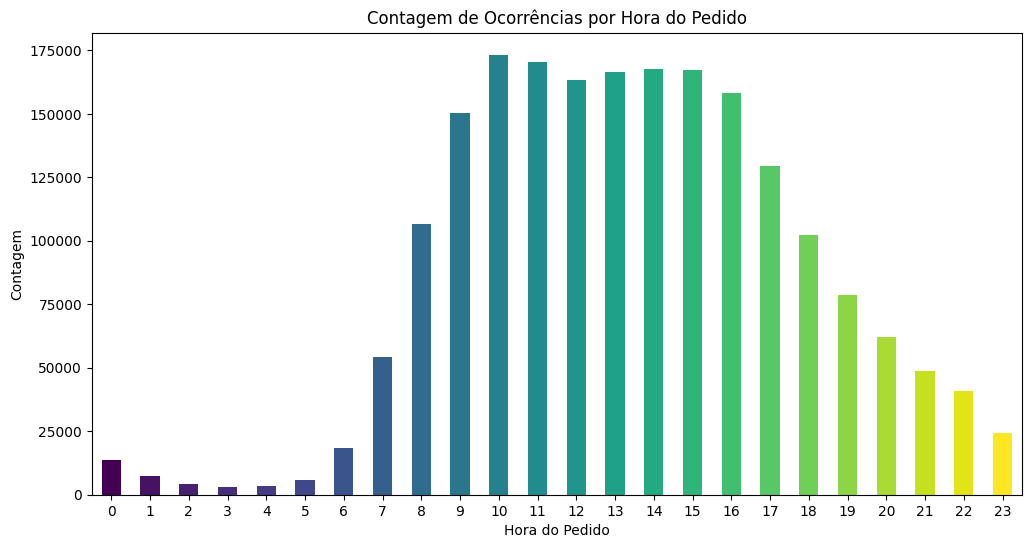

In [18]:
# Dados para o gráfico de barras
counts = data['order_hour_of_day'].value_counts().sort_index()  # Ordenando os valores

#Definindo paleta de cores
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# Plotando o gráfico de barras com cores graduais
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color=colors)
plt.title('Contagem de Ocorrências por Hora do Pedido')
plt.xlabel('Hora do Pedido')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()


A variável que representa a hora do pedido pode seguir uma distribuição normal? É uma hipótese interessante

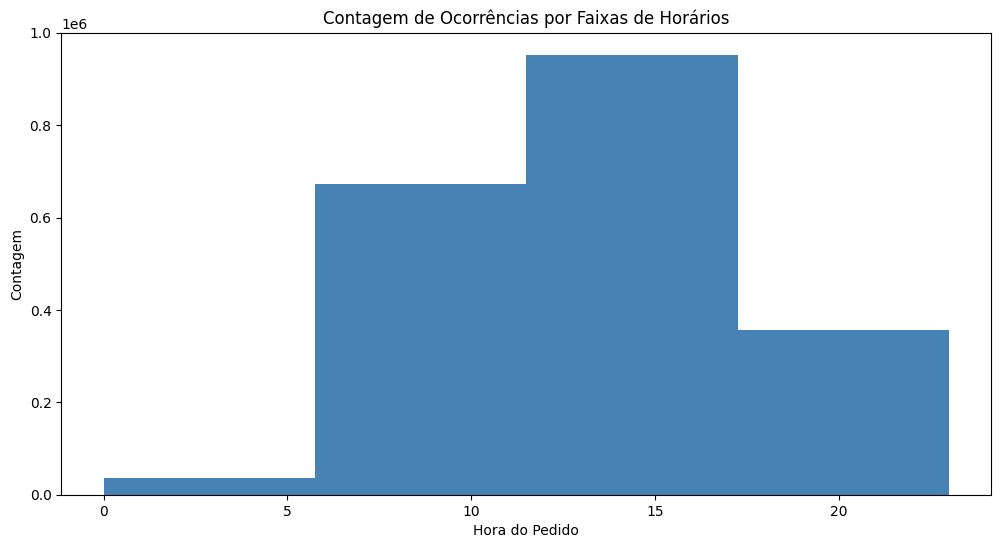

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(data['order_hour_of_day'], bins=4, color='steelblue')
plt.title('Contagem de Ocorrências por Faixas de Horários')
plt.xlabel('Hora do Pedido')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()

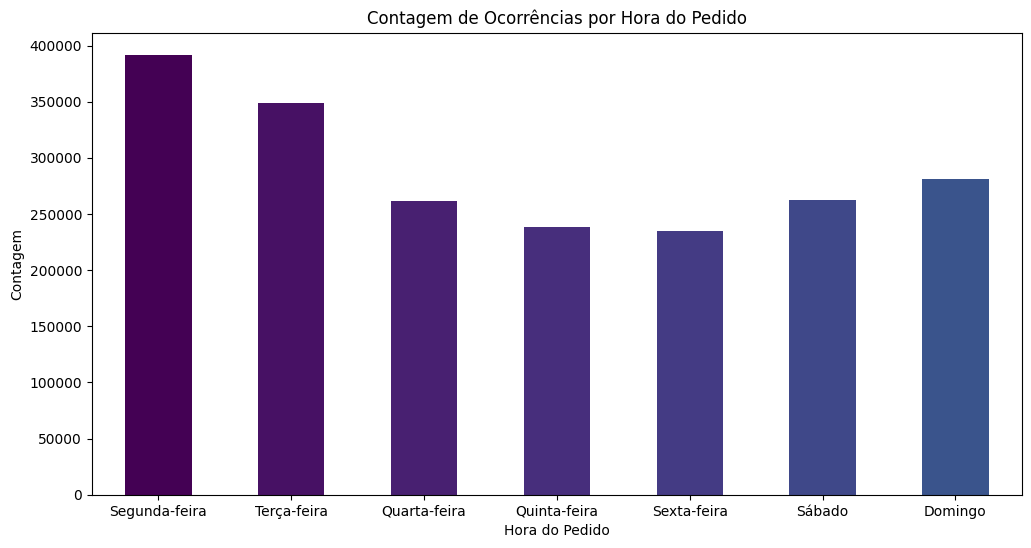

In [20]:
# Dados para o gráfico de barras
counts = data['order_dow'].value_counts().sort_index()  # Ordenando os valores

dias_da_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# Plotando o gráfico de barras com cores graduais
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color=colors)
plt.title('Contagem de Ocorrências por Hora do Pedido')
plt.xlabel('Hora do Pedido')
plt.ylabel('Contagem')
plt.xticks(np.arange(7), [dias_da_semana[dia] for dia in range(7)], rotation=0)
plt.show()


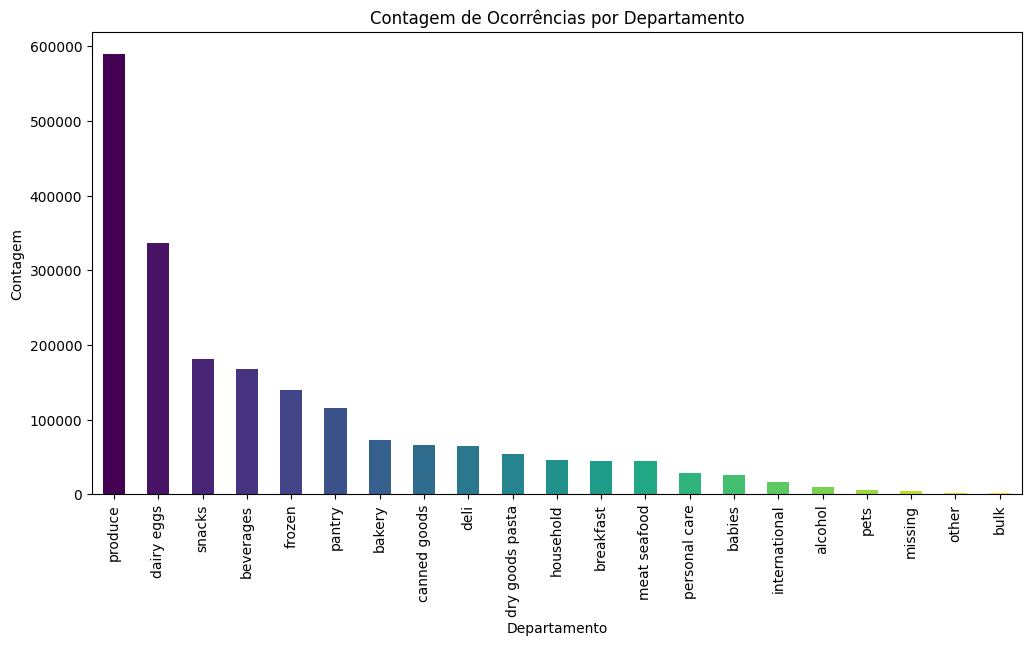

In [21]:
# Dados para o gráfico de barras
counts = data['department'].value_counts()

# Criando uma paleta de cores gradual usando 'viridis'
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# Plotando o gráfico de barras com cores graduais
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color=colors)
plt.title('Contagem de Ocorrências por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.show()

<Axes: >

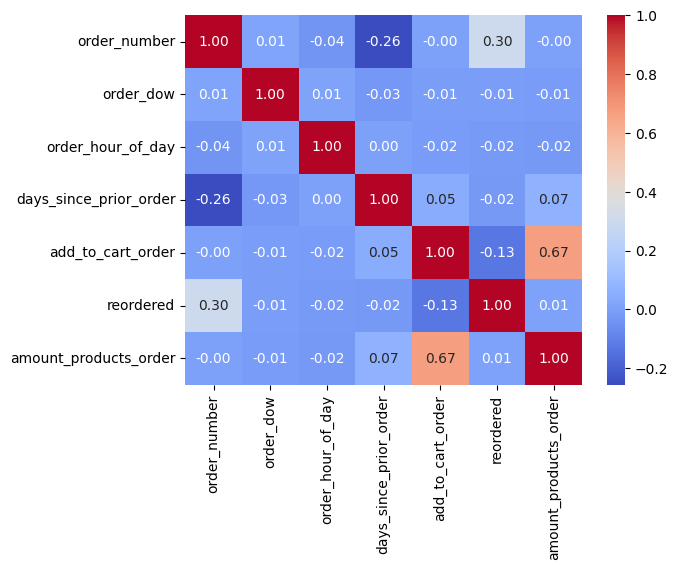

In [22]:
data_numeric = data.drop(['department', 'product_name', 'order_id', 'user_id', 'product_id', 'department_id'], axis=1)

correlation_matrix = data_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})

A partir dessas informações podemos levantar alguns questionamentos:
- As variáveis 'order_dow' e 'order_hour_of_day', que representam o dia da semana do pedido e a hora do pedido, apresentam correlação baixa. Precisamos realizar testes para verificar se essas variáveis são realmente independentes, e a posteriori concluir como podemos interpretar o gráfico de distribuição de frequência dos horários apresentados anteriormente.
- As variáveis 'reordered' e 'order_number' apresentam correlação "alta". Porém, quão forte é a dependência dessas duas variáveis? É evidente que pessoas que refazem um pedido, acabam aumentando o número de pedidos. Contudo, pode ser que essa correlação se estenda além dessa regra.
- Alta correlação entre a quantidade de produtos em uma compra e a quantidade de produtos adicionados ao carrinho. Isso é óbvio, porém, precisamos ter atenção às nuances dessa relação.

# Hipóteses e Inferência